# Team Accel 

#### *Project: Comparing different Machine Learning algorithms in classifying user localization in an indoor environment*

#### Source: __[Indoor Localization Data](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Wireless%20Indoor%20Localization)__

How to run code: 
1. Go to this link to download the dataset: 
Source: __[Data file](https://drive.google.com/file/d/1op9VmjKCFJJKdq3LBZhQJV8gqCE7GzBL/view?usp=sharing)__

2. Place dataset file into same directory where Jupyter Notebook is being run

3. Either run each cell separately or run full notebook

***Note:*** Running separately allows for easier overview

-------------------

## Neural Network Implementation, by James Clark

In [287]:
import pandas as pd  #data processing
import numpy as np   #linear algebra
import matplotlib.pyplot as plt #plotting

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils

In [288]:
#load the dataset
dataset = pd.read_csv('wifi_localization_data.csv')

#extract the target variable vector, and the independent attribute matrix
Y = dataset.iloc[:,7:8].values
X = dataset.iloc[:,0:7].values

In [289]:
#preprocessing -- make target value from 0-3 instead of 1-4, for ANN
Y = Y - 1

#preprocessing -- make target value into categorical attribute vector
Y_categorical = np_utils.to_categorical(Y)

#preprocessing -- normalize the independent attribute matrix
scalerX = MinMaxScaler()
scalerX.fit(X)

xscale = scalerX.transform(X)

In [290]:
#training -- generate the test/train split with 25% training 
X_train, X_test, Y_train, Y_test = train_test_split(xscale, Y_categorical)

#network 2

#build the neural network
model = Sequential()
#network 1

#model.add(Dense(64, input_dim=7, kernel_initializer='random_normal', activation='relu'))
#model.add(Dense(4, activation='sigmoid'))
#model.add(Dense(4, activation='sigmoid'))

#network 2

#model.add(Dense(64, input_dim=7, kernel_initializer='random_normal', activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='sigmoid'))


#network 3

model.add(Dense(64, input_dim=7, kernel_initializer='random_normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))

In [291]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['mse', 'mae', 'accuracy'])
history = model.fit(X_train, Y_train, epochs=75, batch_size=100, verbose=1, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                

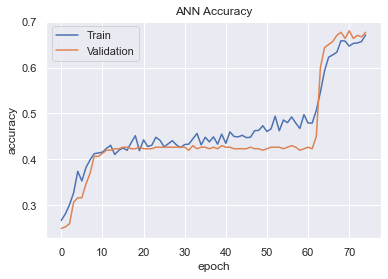

In [292]:
#graph the accuracy metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

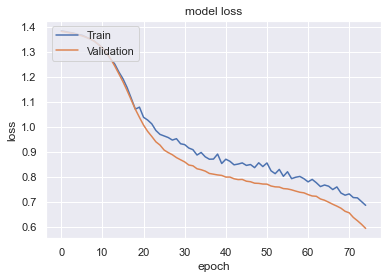

In [293]:
#graph the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [294]:
#predict values
#X_train_predict = scalerX.transform(X_train)
Y_train_predict = model.predict(X_test)

#print (Y_train_predict)
preds=(np.argmax(Y_train_predict, axis=1) + 1)

In [295]:
#preprocessing -- make target value into categorical attribute vector
Y_pred_categorical = np_utils.to_categorical(preds)
Y_pred_cleaned = Y_pred_categorical[:,1:5]

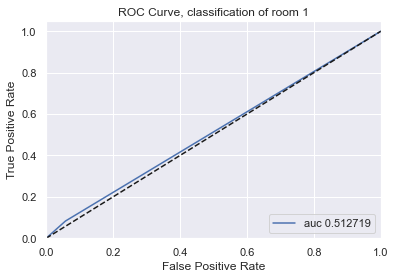

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84       380
         1.0       0.31      0.08      0.13       120

    accuracy                           0.74       500
   macro avg       0.54      0.51      0.49       500
weighted avg       0.66      0.74      0.67       500



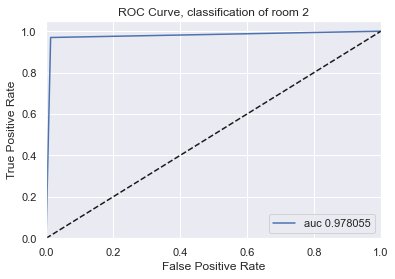

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       368
         1.0       0.96      0.97      0.97       132

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



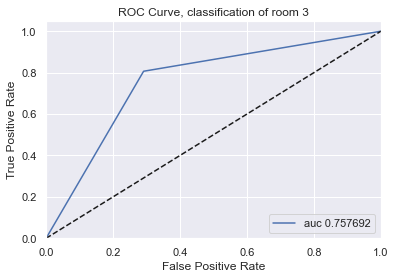

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80       381
         1.0       0.46      0.81      0.59       119

    accuracy                           0.73       500
   macro avg       0.69      0.76      0.70       500
weighted avg       0.81      0.73      0.75       500



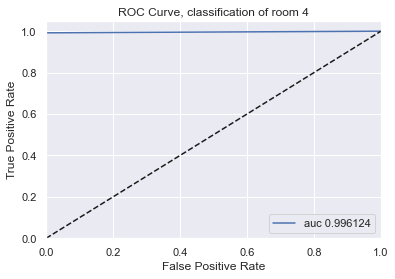

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       371
         1.0       1.00      0.99      1.00       129

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [296]:
#Plot the ROC Curve 

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred_cleaned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='auc %f' %roc_auc[i])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve, classification of room %d' % (i + 1))
    plt.legend(loc="lower right")
    plt.show()
    print (classification_report(Y_test[:, i], Y_pred_cleaned[:, i]))

***

## Naive-Bayes and Decision Tree Implementation, by Flore Norceide

In [269]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [270]:
# Looding the data
wifi_bayes = pd.read_csv("wifi_localization_data.csv")

wifi_bayes.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Room
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1


In [271]:
wifi_bayes.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


In [272]:
# Split data into input and output to later split into test/train
X = wifi_bayes.drop('Room', axis=1)
y = wifi_bayes.loc[:, 'Room']

print('y values')
print(y.head())
print('x values')
print(X.head())

y values
0    1
1    1
2    1
3    1
4    1
Name: Room, dtype: int64
x values
   Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  Sensor7
0       64       56       61       66       71       82       81
1       68       57       61       65       71       85       85
2       63       60       60       67       76       85       84
3       61       60       68       62       77       90       80
4       63       65       60       63       77       81       87


In [273]:
# Assigning test data size 20-80 test/train
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.20, random_state=0)

# Creating the Gaussian Classifier model
gauss_model = GaussianNB()

# Training the model
gauss_model.fit(X_train, y_train)

# Predict the output
out_pred = gauss_model.predict(X_test)

# Look at the log probability
log_pred = gauss_model.predict_log_proba(X_test)

Text(34.82000000000001, 0.5, 'Predicted Localization')

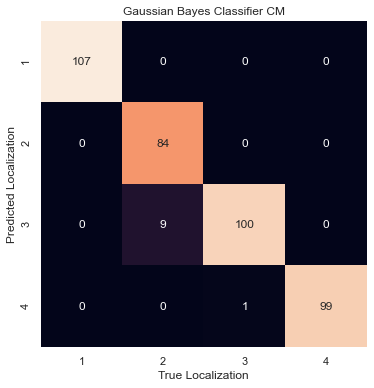

In [275]:
# Plot Confusion Matrix
conf_mat = confusion_matrix(out_pred, y_test)
names = np.unique(out_pred) # To have each prediction only once

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = names, yticklabels = names)

plt.title("Gaussian Bayes Classifier CM")
plt.xlabel('True Localization')
plt.ylabel('Predicted Localization')

In [236]:
# Getting a numerical synopsys of the accuracy of our model
print(classification_report(y_test, out_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      0.90      0.95        93
           3       0.92      0.99      0.95       101
           4       0.99      1.00      0.99        99

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



## Decision Tree Classifier

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [238]:
X_tree = wifi_bayes.drop('Room', axis=1)
y_tree = wifi_bayes.loc[:, 'Room']

In [239]:
XTrain, XTest, YTrain, YTest = train_test_split(X_tree, y_tree, random_state=0)

In [240]:
tree_model = DecisionTreeClassifier(max_depth=5).fit(XTrain, YTrain)

In [265]:
class_name = y_tree.values.astype(str)
tree.export_graphviz(tree_model, out_file='tree_viz', 
                     class_names = class_name, rounded = True, 
                     filled = True)

In [242]:
tree_pred = tree_model.predict(XTest)

In [243]:
acc = accuracy_score(YTest, tree_pred)
report = classification_report(tree_pred, YTest)

print("Accuracy: ", acc)
print("Classification Report: ", report)

Accuracy:  0.962
Classification Report:                precision    recall  f1-score   support

           1       0.99      0.98      0.99       133
           2       0.93      0.97      0.95       116
           3       0.96      0.90      0.93       136
           4       0.97      0.99      0.98       115

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



Text(34.82000000000001, 0.5, 'Predicted value')

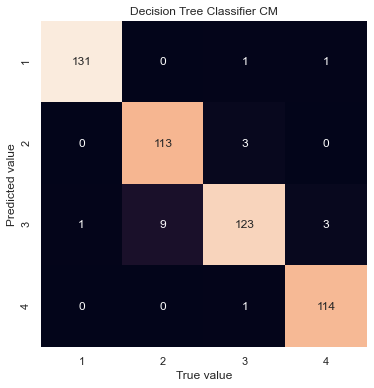

In [276]:
# Plot Confusion Matrix
confmat_tree = confusion_matrix(tree_pred, YTest)
classes = np.unique(tree_pred) # To have each prediction only once

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confmat_tree, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = classes, yticklabels = classes)

plt.title("Decision Tree Classifier CM")
plt.xlabel('True value')
plt.ylabel('Predicted value')

array([<AxesSubplot:title={'center':'Tested Values'}>], dtype=object)

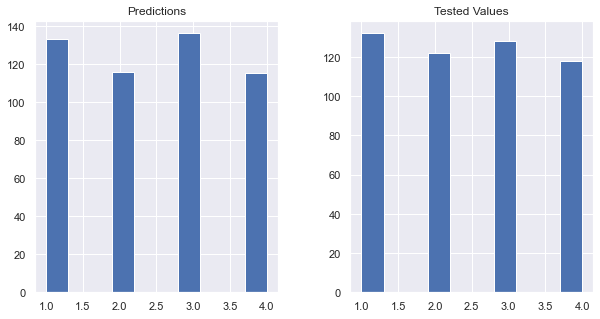

In [245]:
import pandas as pd

p1 = pd.DataFrame(tree_pred, columns=['Predictions'])
p2 = pd.DataFrame(YTest.values, columns=['Tested Values'])

fig, axes = plt.subplots(1, 2,figsize=(10,5))
p1.hist('Predictions', bins='auto', ax=axes[0])
p2.hist('Tested Values', bins='auto', ax=axes[1])

***

## kNearestNeighbor Implementation, by Oskar Barrera

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [248]:
data=pd.read_csv("wifi_localization_data.csv")

data.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Room
0,64,56,61,66,71,82,81,1
1,68,57,61,65,71,85,85,1
2,63,60,60,67,76,85,84,1
3,61,60,68,62,77,90,80,1
4,63,65,60,63,77,81,87,1


array([[<AxesSubplot:title={'center':'Sensor1'}>,
        <AxesSubplot:title={'center':'Sensor2'}>,
        <AxesSubplot:title={'center':'Sensor3'}>],
       [<AxesSubplot:title={'center':'Sensor4'}>,
        <AxesSubplot:title={'center':'Sensor5'}>,
        <AxesSubplot:title={'center':'Sensor6'}>],
       [<AxesSubplot:title={'center':'Sensor7'}>,
        <AxesSubplot:title={'center':'Room'}>, <AxesSubplot:>]],
      dtype=object)

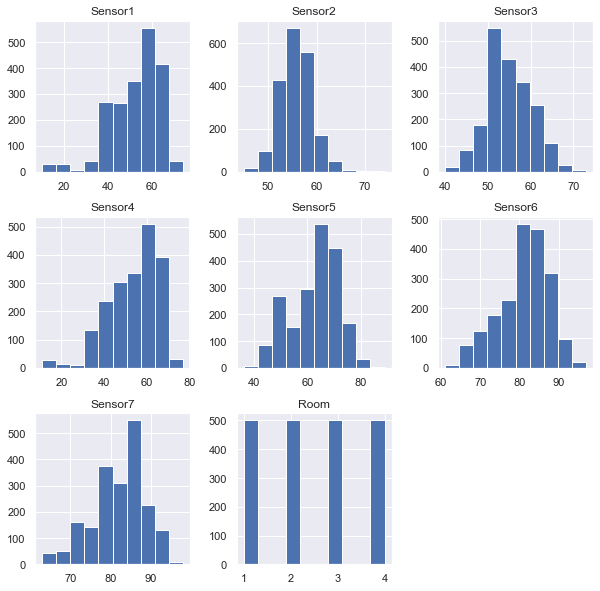

In [249]:
data.hist(figsize=(10,10))

In [250]:
data.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Room
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.330500,55.623500,54.964000,53.566500,62.640500,80.985000,81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,10.000000,45.000000,40.000000,11.000000,36.000000,61.000000,63.000000,1.000000
25%,46.000000,53.000000,51.000000,46.000000,56.000000,77.000000,78.000000,1.750000
50%,55.000000,56.000000,55.000000,56.000000,64.000000,82.000000,83.000000,2.500000
75%,61.000000,58.000000,58.000000,63.000000,69.000000,86.000000,87.000000,3.250000
max,74.000000,74.000000,73.000000,77.000000,89.000000,97.000000,98.000000,4.000000


In [251]:
print(data.groupby('Room').size())

Room
1    500
2    500
3    500
4    500
dtype: int64


In [252]:
X = data[['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor6','Sensor7']].values
y = data['Room'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [253]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.98


In [254]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[131   0   1   0]
 [  0 113   9   0]
 [  0   1 126   1]
 [  0   0   0 118]]


In [255]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       132
           2       0.99      0.93      0.96       122
           3       0.93      0.98      0.95       128
           4       0.99      1.00      1.00       118

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



([<matplotlib.axis.XTick at 0x2b1d9163be0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

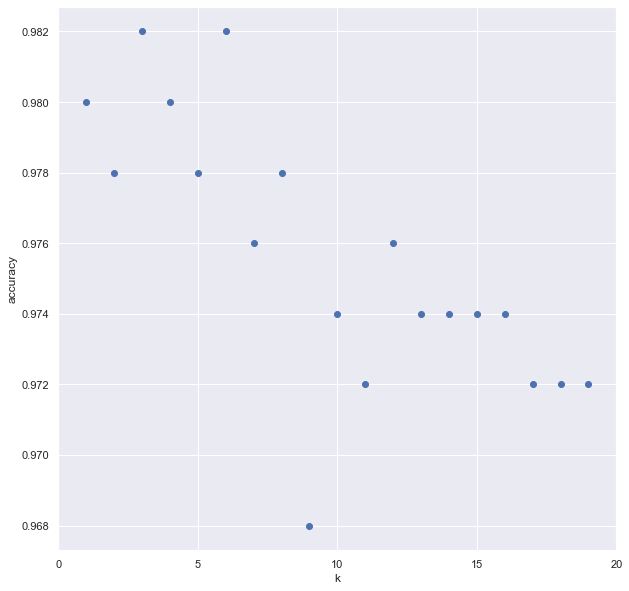

In [256]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

***

## Random Forest Implementation, by Prism Prajapati

In [257]:
# Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [280]:
#loading data
file = pd.read_csv('wifi_localization_data.csv')

In [281]:
feature_set = file.drop(['Room'], axis=1) # removing the target column from the data frame for selecting the features
target_col = file['Room'] # Picking the terget column from the dataframe

In [282]:
# dividing the dataset into train and test set
from sklearn.model_selection import train_test_split
f_train, f_test, t_train, t_test = train_test_split(feature_set,target_col,random_state=1)

In [283]:
# Importing random forest model from sklearn library
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(f_train, t_train) # Training the model
rf_Predicted = rf_model.predict(f_test) # Predicting for test set
rf_Predicted

array([2, 4, 3, 3, 3, 4, 2, 1, 3, 2, 3, 3, 4, 3, 1, 4, 2, 3, 2, 3, 1, 4,
       4, 2, 2, 1, 4, 1, 2, 1, 4, 2, 4, 2, 2, 2, 2, 1, 2, 4, 1, 1, 3, 3,
       3, 4, 2, 4, 4, 4, 4, 3, 2, 1, 2, 2, 2, 2, 4, 3, 4, 1, 3, 3, 3, 2,
       3, 2, 2, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1,
       1, 1, 1, 2, 1, 4, 4, 2, 3, 3, 2, 1, 4, 1, 2, 1, 2, 4, 4, 3, 2, 3,
       2, 1, 3, 4, 1, 2, 2, 3, 4, 3, 3, 3, 4, 3, 2, 3, 3, 3, 4, 2, 3, 2,
       2, 1, 2, 3, 4, 1, 4, 1, 2, 1, 4, 3, 2, 3, 3, 4, 3, 4, 2, 1, 4, 3,
       1, 4, 4, 4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 1, 3, 2, 2, 3, 1, 4, 1, 2,
       2, 2, 2, 3, 2, 4, 2, 4, 4, 4, 3, 3, 1, 2, 1, 4, 3, 4, 1, 1, 1, 1,
       2, 2, 2, 3, 4, 3, 4, 2, 3, 4, 3, 2, 4, 4, 1, 3, 2, 1, 2, 1, 4, 2,
       3, 4, 3, 1, 4, 1, 2, 3, 1, 4, 3, 4, 4, 2, 1, 3, 2, 3, 3, 4, 4, 2,
       2, 4, 1, 1, 3, 2, 4, 4, 1, 1, 3, 4, 4, 3, 3, 4, 2, 1, 3, 4, 1, 4,
       4, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3, 2, 1, 4, 1, 3, 1, 4, 2, 4, 3, 3,
       4, 1, 3, 3, 3, 1, 4, 2, 4, 1, 2, 2, 3, 1, 1,

In [284]:
# Importing accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(t_test, rf_Predicted)

0.984

In [285]:
print(classification_report(t_test, rf_Predicted))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       123
           2       0.99      0.98      0.99       132
           3       0.98      0.96      0.97       121
           4       0.97      1.00      0.98       124

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



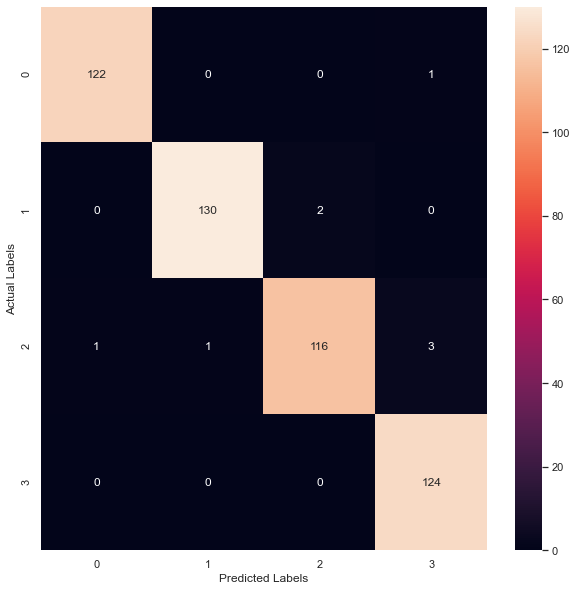

In [286]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(t_test,rf_Predicted)
figure, axes = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

-----